# Определение перспективного тарифа для телеком компании

## Краткое описание проекта

«Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

#### Описание тарифов:
##### Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей
##### Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

## Формулировка задания

1. Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.
2. Проверьте гипотезы:
 - Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
 - Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

## Описание входных данных

Файл ___users.csv___ (информация о пользователях):
- _user_id_ — уникальный идентификатор пользователя
- _first_name_ — имя пользователя
- _last_name_ — фамилия пользователя
- _age_ — возраст пользователя (годы)
- _reg_date_ — дата подключения тарифа (день, месяц, год)
- _churn_date_ — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- _city_ — город проживания пользователя
- _tariff_ — название тарифного плана

Файл ___calls.csv___ (информация о звонках):
- _id_ — уникальный номер звонка
- _call_date_ — дата звонка
- _duration_ — длительность звонка в минутах
- _user_id_ — идентификатор пользователя, сделавшего звонок

Файл ___messages.csv___ (информация о сообщениях):
- _id_ — уникальный номер сообщения
- _message_date_ — дата сообщения
- _user_id_ — идентификатор пользователя, отправившего сообщение

Файл ___internet.csv___ (информация об интернет-сессиях):
- _id_ — уникальный номер сессии
- _mb_used_ — объём потраченного за сессию интернет-трафика (в мегабайтах)
- _session_date_ — дата интернет-сессии
- _user_id_ — идентификатор пользователя

Файл ___tariffs.csv___ (информация о тарифах):
- _tariff_name_ — название тарифа
- _rub_monthly_fee_ — ежемесячная абонентская плата в рублях
- _minutes_included_ — количество минут разговора в месяц, включённых в абонентскую плату
- _messages_included_ — количество сообщений в месяц, включённых в абонентскую плату
- _mb_per_month_included_ — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- _rub_per_minute_ — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- _rub_per_message_ — стоимость отправки сообщения сверх тарифного пакета
- _rub_per_gb_ — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## План выполнения задания
1. Изучить полученные данные, найти и исправить ошибки, привести к нужным типам;


2. Посчитать для каждого пользователя:
 - количество сделанных звонков по месяцам;
 - количество израсходованных минут разговора по месяцам;
 - количество отправленных сообщений по месяцам;
 - объем израсходованного интернет-трафика по месяцам;
 - помесячную выручку с пользователя.
 
 
3. Для каждого тарифа найти среднее значение, дисперсию и стандартное отклонение для следующих величин:
 - Количество минут разговора в месяц;
 - Количиство сообщений в месяц;
 - Объём интернет-трафика за месяц; 
   
   Построить гистограммы получившихся распределений и описать их.
   
   
4. Проверить гипотезы:
 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

---
## Комментарий от наставника

Хорошее вступление в работу.

---

## Шаг 1. Первичное изучение данных

Импортируем необходимые модули:

In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as st
from math import ceil
from IPython.display import display

matplotlib.rcParams['figure.figsize'] = (10.,5.)
pd.set_option('display.max_columns', 100)

Нами получены файлы .csv с данными о пользователях. Откроем их и сохраним получившиеся таблицы в переменных __tariffs__, __users__, __calls__, __internet__ и __messages__:

In [6]:
tariffs  = pd.read_csv('/datasets/tariffs.csv')
users    = pd.read_csv('/datasets/users.csv')
calls    = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')

#### 1. Таблица tariffs
Изучим полученные данные. Начнем с таблицы __tariffs__ - выведем общую информацию и содержимое:

In [7]:
tariffs.rename(columns = {'mg_per_month_included':'mb_included'}, inplace = True) #исправим опечатку

display(tariffs)
print(tariffs.info())

messages_included  mb_included  minutes_included  rub_monthly_fee  \
0                 50        15360               500              550   
1               1000        30720              3000             1950   

   rub_per_gb  rub_per_message  rub_per_minute tariff_name  
0         200                3               3       smart  
1         150                1               1       ultra

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included    2 non-null int64
mb_included          2 non-null int64
minutes_included     2 non-null int64
rub_monthly_fee      2 non-null int64
rub_per_gb           2 non-null int64
rub_per_message      2 non-null int64
rub_per_minute       2 non-null int64
tariff_name          2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


Тут все понятно: в таблице содержится информация о тарифах оператора. Все данные в представлены подходящими типами, пропусков и ошибок нет.

Для удобства дальнейшей работы сделаем столбец __tariff_name__ индексом таблицы:

In [8]:
tariffs.set_index('tariff_name', inplace = True, drop = True)
# tariffs     #Проверка

#### 2. Таблица users
Далее рассмотрим таблицу __users__ - выведем для наглядности несколько строк, а также общую информацию о ней:

In [9]:
display(users.sample(5))
print(users.info())

user_id  age churn_date             city first_name  last_name  \
36      1036   47        NaN  Санкт-Петербург   Анжелика  Андропова   
289     1289   20        NaN           Москва     Таисия  Богданова   
407     1407   40        NaN        Челябинск       Элла   Пирогова   
113     1113   52        NaN             Чита    Харитон   Булгаков   
488     1488   47        NaN     Новороссийск      Вадим    Филатов   

       reg_date tariff  
36   2018-07-14  smart  
289  2018-09-01  ultra  
407  2018-08-14  smart  
113  2018-01-24  smart  
488  2018-11-07  smart

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


Таблица состоит из 500 записей, в которых содержаться сведения о пользователях оператора: их личные данные и информация о подключенном тарифе. Типы данных - строковый (object) , целочисленный (int). 

В столбце __churn_date__ (дата прекращения пользования тарифом) присутствуют пропущенные значения, которые означают, что тариф на момент выгрузки данных был активен. Поскольку наше исследование будет охватывать только 2018 год, мы можем заполнить пропуски в данном поле значением ___"2018-12-31"___ (последний день года).

In [10]:
users['churn_date'].fillna('2018-12-31', inplace = True)
print('Пропусков в столбце churn_date:', users['churn_date'].isna().sum())                     #проверка

Пропусков в столбце churn_date: 0


Поскольку каждая строка таблицы соответствует одному пользователю, сделаем столбец __user_id__ индексом таблицы:

In [11]:
users.set_index('user_id', inplace = True, drop = True)

В остальном проблем с данной таблицей нет.
#### 3. Таблица calls
Теперь изучим таблицу __calls__:

In [12]:
display(calls.sample(5))
print(calls.info())

id   call_date  duration  user_id
152436   1380_71  2018-11-07      6.84     1380
90227   1225_487  2018-05-30     10.24     1225
119266   1308_52  2018-04-08      2.09     1308
119422  1308_208  2018-10-19      7.52     1308
45099   1113_515  2018-06-06      0.15     1113

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


В данной таблице указана информация совершенных пользователями звонках (продолжительность, дата, идентификатор пользователя; всего 202607 записей). Изучим подробнее значения столбца __duration__ (продолжительность звонка) - построим гистограмму и найдем основные метрики:

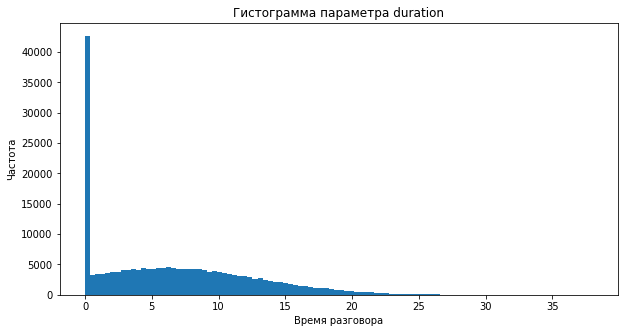

In [13]:
calls['duration'].plot(kind = 'hist', bins = 100, title = 'Гистограмма параметра duration')
plt.xlabel('Время разговора')
plt.ylabel('Частота')
plt.show()

Можно заметить, что значительная доля звонков имеет продолжительность 0.0 минут. Найдем их точное количество:

In [14]:
print('Звонков с нулевой продолжительностью:', calls['duration'].value_counts()[0.0])

Звонков с нулевой продолжительностью: 39613


Мы видим, что значений ___0.0___ в столбце - почти 40000, или 20 процентов от общего числа. 

Посмотрим, есть ли какая-либо закономерность в появлении таких записей. Для этого сначала посчитаем для каждого клиента общее количество совершенных звонков и количество звонков с нулевой продолжительностью, а также их соотношение: 

In [15]:
calls_by_client = (calls.pivot_table(index = 'user_id', 
                                     values = 'duration', 
                                     aggfunc = 'count')
                        .join(calls.query('duration == 0').pivot_table(index = 'user_id', 
                                                                       values = 'duration', 
                                                                       aggfunc = 'count'), 
                              rsuffix = '_is_0'))
calls_by_client['ratio'] = calls_by_client['duration_is_0'] / calls_by_client['duration'] 
calls_by_client.head()

duration  duration_is_0     ratio
user_id                                   
1000          368             75  0.203804
1001          122             30  0.245902
1002          217             44  0.202765
1003          520             92  0.176923
1004          176             37  0.210227

Изучим значения столбца __ratio__:

In [16]:
calls_by_client['ratio'].describe()

count    492.000000
mean       0.196122
std        0.029508
min        0.087719
25%        0.180864
50%        0.195652
75%        0.209269
max        0.500000
Name: ratio, dtype: float64

Мы видим следующее:
- "Нулевые" звонки встречаются у каждого пользователя (нет записей с __ratio__, равным 0);
- Максимальная доля таких звонков - 50 процентов;
- В среднем такие звонки составляют около 20 процентов от общего количества (доля такая же, как в целом по выборке).

Скорее всего, появление записей со значением ___0.0___ в столбце __duration__ обусловлено техническими особенностями работы оператора. Например, такие записи возникают, когда абонент не дозвонился по набранному номеру, или при звонках на бесплатные номера.

Поскольку для дальнейших расчетов нас в первую очередь будет интересовать именно длительность звонков, записи со значением ___0.0___ поля __duration__ можно убрать из таблицы.

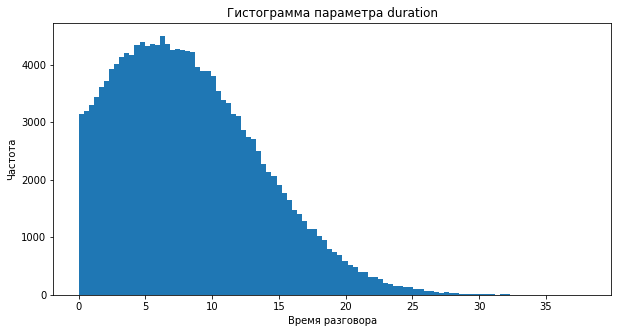

In [17]:
calls = calls.query('duration != 0')
# Построим гистограмму после удаления пропусков
calls['duration'].plot(kind = 'hist', bins = 100, title = 'Гистограмма параметра duration')
plt.xlabel('Время разговора')
plt.ylabel('Частота')
plt.show()

Теперь картина стала похожа на ожидаемую - форма распределения близка к пуассоновской, среднее значение продолжительности звонка находится в районе 5-10 минут.

#### 4. Таблица internet

Проведем аналогичные действия для таблицы __internet__. Выведем общую информацию и несколько строк таблицы:

In [18]:
display(internet.sample(5))
print(internet.info())

id  mb_used session_date  user_id
51667  1175_320   564.99   2018-11-10     1175
38201  1134_256   395.34   2018-04-30     1134
37570    1131_0   677.85   2018-12-27     1131
70470  1240_138   445.02   2018-12-12     1240
58023   1196_21   443.98   2018-12-14     1196

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB
None


В этой таблице указаны сведения об интернет-сессиях пользователей. Количество записей - 149396.

По аналогии с предыдущим пунктом изучим столбец __mb_used__ (объем израсходованного трафика):

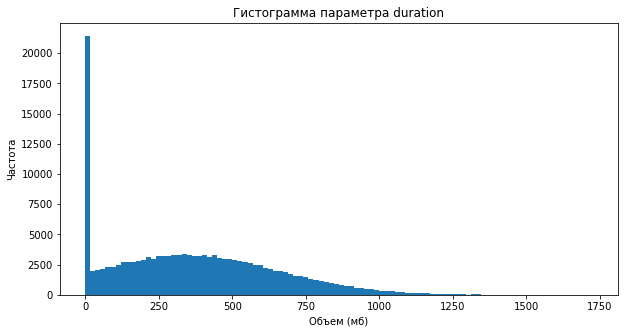

In [19]:
internet['mb_used'].plot(kind = 'hist', bins = 100, title = 'Гистограмма параметра duration')
plt.xlabel('Объем (мб)')
plt.ylabel('Частота')
plt.show()

Видим такую же картину, как и со звонками - значительное количество сессий прошли без расходования трафика (ноль в столбце __mb_used__ ).

In [20]:
print('Сессий с нулевым трафиком:', internet['mb_used'].value_counts()[0.0])

Сессий с нулевым трафиком: 19598


Посмотрим, какова в среднем доля таких сессий:

In [21]:
net_by_client = (internet.pivot_table(index = 'user_id', 
                                      values = 'mb_used', 
                                      aggfunc = 'count').
                 join(internet.query('mb_used == 0').pivot_table(index='user_id', 
                                                                 values='mb_used', 
                                                                 aggfunc = 'count'), 
                      rsuffix = '_is_0'))
net_by_client['ratio'] = net_by_client['mb_used_is_0'] / net_by_client['mb_used']
net_by_client['ratio'].describe()

count    494.000000
mean       0.126604
std        0.056198
min        0.008264
25%        0.063419
50%        0.146459
75%        0.168578
max        0.250000
Name: ratio, dtype: float64

Картина схожа со звонками: интернет-сессии с нулевым трафиком встречаются у каждого пользователя, их доля в среднем составляет около 15 процентов от всех соединений.

Удалим записи со значением _0.0_ в поле __mb_used__ из таблицы - для расчета выручки нам нужны только сессии с ненулевым трафиком:

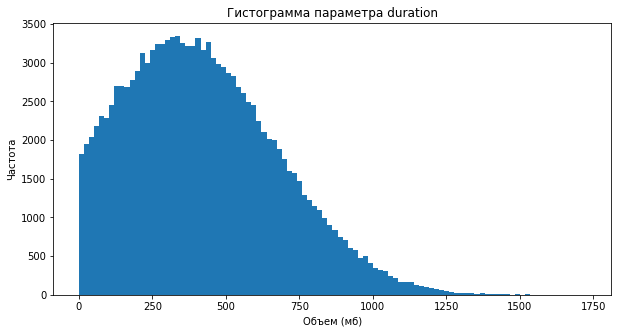

In [22]:
internet = internet.query('mb_used != 0')
#Построим гистограмму по обновленным данным
internet['mb_used'].plot(kind = 'hist', bins = 100, title = 'Гистограмма параметра duration')
plt.xlabel('Объем (мб)')
plt.ylabel('Частота')
plt.show()

Получили близкое к пуассоновскому распределение с макисмумом в районе 250 - 500 мегабайт за сессию, что в принципе соответствует ожиданиям.
#### 5. Таблица messages
Наконец, проверим таблицу __messages__:

In [23]:
display(messages.sample(5))
print(messages.info())

id message_date  user_id
96906  1396_557   2018-04-21     1396
41073  1174_418   2018-10-08     1174
19709  1087_107   2018-10-09     1087
51225  1227_250   2018-07-20     1227
80909  1338_107   2018-07-04     1338

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


В этой таблице содержатся записи об отправленных сообщениях (123036 строк). Проблем с данными в таблице нет.

## Вывод
На этом шаге мы изучили полученные данные и устранили найденные в них пропуски и ошибки:
- Пропуски в столбце __churn_date__ таблицы __users__ - заменены значением 2018-12-31 (если дата прекращения пользования тарифом не указана, значит он был активен как минимум до конца исследуемого года);
- В таблицах __calls__ и __internet__ обнаружены записи о звонках продолжительностью ___0.0___ минут и интернет-соединениях с объемом трафика ___0.0___ мегабайт соответственно. Каких-либо закономерностей возникновения этих записей не обнаружено. По всей видимости, их появление обусловлено техническими аспектами заполнения таблиц - например, оператор в таком виде может сохранять информацию о непринятых звонках и неуспешных подключениях. Данные записи удалены из соответствующих таблиц.

## Шаг 2. Подготовка данных
#### 1. Преобразование типов
В таблице __users__ преобразуем столбцы __churn_date__ и __reg_date__ в тип datetime:

In [24]:
users['churn_date'], users['reg_date'] = pd.to_datetime(users['churn_date']), pd.to_datetime(users['reg_date'])

Что касается звонков, сообщений и интернет-сессий, то для наших расчетов нам нужен только месяц, когда была оказана соответствующая услуга связи. 

Добавим в каждую таблицу столбец __month__, где будет указан номер месяца.

In [25]:
calls['month']    = pd.to_datetime(calls['call_date']).dt.month
internet['month'] = pd.to_datetime(internet['session_date']).dt.month
messages['month'] = pd.to_datetime(messages['message_date']).dt.month

Также приведем к целочисленному типу (int) значения в столбцах __duration__ и __mb_used__, округлив их вверх (именно так при расчетах поступает оператор):

In [26]:
calls['duration']   = calls['duration'].apply(ceil)              #функция ceil() возвращает int
internet['mb_used'] = internet['mb_used'].apply(ceil)

display(calls.head(3), internet.head(3), messages.head(3))       #Проверка

id   call_date  duration  user_id  month
2  1000_2  2018-06-11         3     1000      6
3  1000_3  2018-09-21        14     1000      9
4  1000_4  2018-12-15         6     1000     12

id  mb_used session_date  user_id  month
0  1000_0      113   2018-11-25     1000     11
1  1000_1     1053   2018-09-07     1000      9
2  1000_2     1198   2018-06-25     1000      6

id message_date  user_id  month
0  1000_0   2018-06-27     1000      6
1  1000_1   2018-10-08     1000     10
2  1000_2   2018-08-04     1000      8

#### 2. Расчет помесячного использования услуг и выручки с каждого пользователя
Создадим таблицу __usage_per_month__, в которой для всех пользователей будут посчитаны по месяцам:
- суммарная продолжительность звонков;
- суммарный объем интернет-трафика;
- количество отправленных сообщений;
- тариф пользователя.

In [27]:
#Создадим отдельные сводные таблицы по звонкам, сообщениям и мегабайтам, затем объединим их в одну
calls_per_month = calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = 'sum')
inet_per_month  = internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum')
msgs_per_month  = messages.pivot_table(index=['user_id', 'month'], values = 'id', aggfunc = 'count')

usage_per_month = (calls_per_month
                   .join(inet_per_month, on = ['user_id', 'month'], how = 'outer')
                   .join(msgs_per_month, on = ['user_id', 'month'], how = 'outer')
                   .reset_index())
usage_per_month.rename(columns = {'id':'messages'}, inplace=True)
#Добавим столбец с названием тарифа, взяв его из users
usage_per_month['tariff'] = usage_per_month['user_id'].apply(lambda x: users.loc[x, 'tariff'])

usage_per_month.head(10)

user_id  month  duration  mb_used  messages tariff
0     1000      5     159.0   2256.0      22.0  ultra
1     1000      6     172.0  23257.0      60.0  ultra
2     1000      7     340.0  14016.0      75.0  ultra
3     1000      8     408.0  14070.0      81.0  ultra
4     1000      9     466.0  14581.0      57.0  ultra
5     1000     10     350.0  14717.0      73.0  ultra
6     1000     11     338.0  14768.0      58.0  ultra
7     1000     12     333.0   9827.0      70.0  ultra
8     1001     11     430.0  18452.0       NaN  smart
9     1001     12     414.0  14053.0       NaN  smart

Теперь рассчитаем для каждого пользователя затраты на услуги связи за каждый месяц пользования тарифом. Рассчет будем производить по следующей формуле:

    Общая сумма расходов = Ежемесячная абонентская плата +
                         + Количество минут звонков сверх лимита, помноженное на стоимость одной минуты +
                         + Количество сообщений сверх лимита, помноженное на стоимость одного сообщения +
                         + Объем интернет-трафика сверх лимита (в Гб), помноженный на стоимость одного гигабайта

In [28]:
def count_monthly_cost(usage):
    
    #Функция для расчета помесячной выручки
    
    usage  = usage.fillna(0)                  # Для расчетов избавимся от NaN
    tariff = tariffs.loc[usage['tariff'], :]  
     
    extra_minutes  = usage['duration'] - tariff['minutes_included'] 
    extra_min_cost = extra_minutes * tariff['rub_per_minute'] if extra_minutes > 0 else 0    

    extra_messages = usage['messages'] - tariff['messages_included']
    extra_msg_cost = extra_messages * tariff['rub_per_message'] if extra_messages > 0 else 0

    extra_gbs      = ceil((usage['mb_used'] - tariff['mb_included']) / 1024)  #гигабайты округляем вверх
    extra_gb_cost  = extra_gbs * tariff['rub_per_gb'] if extra_gbs > 0 else 0
    
    total = tariff['rub_monthly_fee'] + extra_min_cost + extra_msg_cost + extra_gb_cost
    return int(total)


usage_per_month['total_cost'] = usage_per_month.apply(count_monthly_cost, axis = 1)
usage_per_month.sample(5)

user_id  month  duration  mb_used  messages tariff  total_cost
154      1022     12     267.0  15456.0      10.0  smart         750
720      1116      4     168.0   9619.0       NaN  smart         550
2700     1425     11     585.0  16144.0      86.0  smart        1113
2576     1407     12     291.0  16871.0      41.0  smart         950
2016     1323      8     481.0  17018.0      59.0  smart         977

## Вывод
Нами произведено преобразование данных к нужным типам, а также рассчет для каждого пользователя:
- общей продолжительности звонков за месяц;
- общего объема интернет-трафика за месяц;
- количества сообщений за месяц;
- помесячной выручки оператора.

## Шаг 3. Анализ данных

Изучим поведение пользователей разных тарифов, исходя полученных нами расчетных значений.
#### 1. Продолжительность звонков:
Построим гистограммы количества минут, которые требуются абонентам в месяц (отдельно для каждого тарифа):

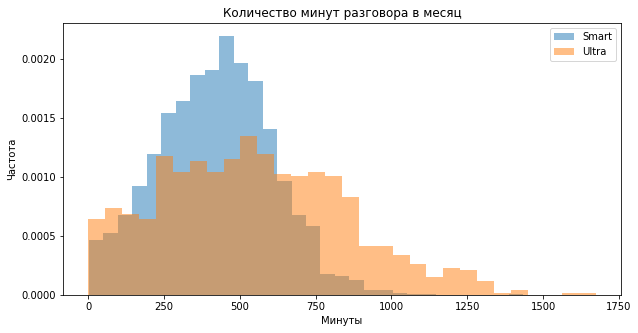

Медиана     Среднее  Ст. отклонение     Дисперсия
tariff                                                   
smart     423.0  419.440342      188.992403  35718.128534
ultra     529.0  547.755016      305.513385  93338.428291

In [29]:
def build_hists(column, xlabel, title):
    usage_per_month.query('tariff == "smart"')[column].plot(kind = 'hist', alpha = 0.5, 
                                                            density = True, bins = 30)
    usage_per_month.query('tariff == "ultra"')[column].plot(kind = 'hist', alpha = 0.5, 
                                                            density = True, bins = 30)
    plt.legend(['Smart', 'Ultra'])
    plt.xlabel(xlabel)
    plt.ylabel('Частота')
    plt.title(title)
    plt.show()
    
    
build_hists('duration', 'Минуты', 'Количество минут разговора в месяц')

duration_metrics = usage_per_month.pivot_table(index = 'tariff', 
                                               values = 'duration', 
                                               aggfunc = ['median', 'mean', np.std, np.var])
duration_metrics.columns = ['Медиана', 'Среднее', 'Ст. отклонение', 'Дисперсия']

duration_metrics

По графикам видно следующее:
- Оба распределения близки к нормальным симметричным. У графика тарифа ___"Smart"___ присутствует незначительная скошенность влево, для ___"Ultra"___ - вправо;
- Средние значения распределений близки: 419 минут для пользователей тарифа ___"Smart"___ , 547 минут - для ___"Ultra"___;
- Распределение для тарифа ___"Ultra"___ имеет намного больший разброс значений, чем ___"Smart"___, что заметно и по графику, и по метрикам разброса (стандартному отклонению и дисперсии).

Помимо этого интересно отметить, что максимальная суммарная длительность звонков находится в районе 1700 минут, что почти вдвое меньше включенных в тариф ___"Ultra"___ 3000 минут. Можно сделать вывод, что лимит по минутам для данного тарифа сильно завышен, и его можно уменьшить. 

Что же касается тарифа ___"Smart"___, то тут лимит (500 минут) установлен правильно и близок к среднему значению соответствующей выборки. Посчитаем ради интереса, как часто пользователи тарифа "выговаривают" лимит:

In [30]:
print('Это происходит в {:.0%} процентах случаев'
      .format(usage_per_month.query('tariff == "smart" and duration > 500').shape[0] / 
              usage_per_month.query('tariff == "smart"').shape[0]))

Это происходит в 34% процентах случаев


#### 2. Сообщения

Построим такие же графики для количества отправленных за месяц сообщений:

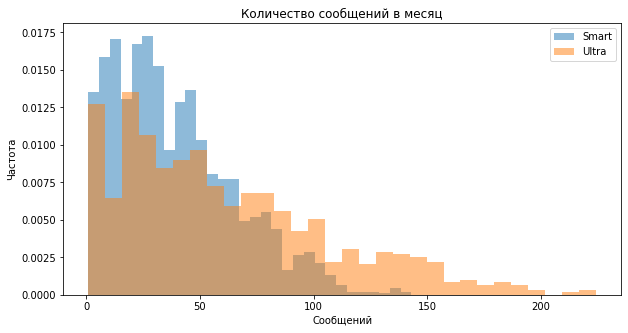

Медиана    Среднее  Ст. отклонение    Дисперсия
tariff                                                 
smart      34.0  38.716441       26.787949   717.594201
ultra      51.0  61.161006       45.931026  2109.659183

In [31]:
build_hists('messages', 'Сообщений', 'Количество сообщений в месяц')

msg_metrics = usage_per_month.pivot_table(index = 'tariff', 
                                          values = 'messages', 
                                          aggfunc = ['median', 'mean', np.std, np.var])
msg_metrics.columns = ['Медиана', 'Среднее', 'Ст. отклонение', 'Дисперсия']

msg_metrics

В среднем пользователи тарифов ___"Smart"___ и ___"Ultra"___ отправляют по 39 и 61 сообщению в месяц соответственно.
При этом, как и в случае со звонками, разброс значений для тарифа ___"Ultra"___ больше, чем для ___"Smart"___, хоть и не так сильно. Оба графика расположены близко к нулю и имеют значительное количество нулевых значений, из чего можно сделать вывод, что сообщения являются наименее востребованной услугой связи. 

И опять-таки, лимит тарифа ___"Ultra"___ в 1000 сообщений в месяц очень завышен (максимальное число сообщений в месяц - около 230). Что же касается пользователей ___"Smart"___, посмотрим, как часто превышают лимит они:

In [32]:
print('Это происходит в {:.0%} процентах случаев'
      .format(usage_per_month.query('tariff == "smart" and messages > 50').shape[0] / 
              usage_per_month.query('tariff == "smart"').shape[0]))

Это происходит в 25% процентах случаев


#### 3. Использование интернета

Исследуем теперь месячный объем интернет-трафика пользователей:

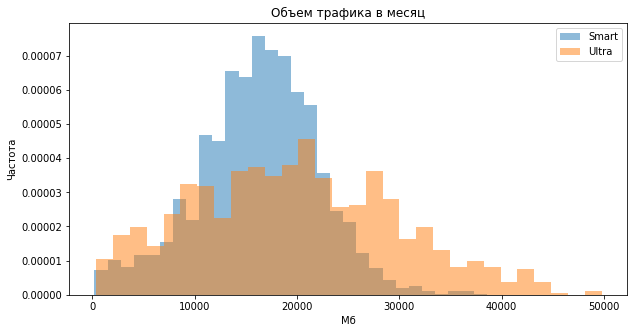

Медиана       Среднее  Ст. отклонение     Дисперсия
tariff                                                     
smart   16533.0  16243.763359     5860.041941  3.434009e+07
ultra   19427.5  19706.979466     9937.127298  9.874650e+07

In [33]:
build_hists('mb_used', 'Мб', 'Объем трафика в месяц')

mb_metrics = usage_per_month.pivot_table(index = 'tariff', 
                                         values = 'mb_used',
                                         aggfunc = ['median', 'mean', np.std, np.var])
mb_metrics.columns = ['Медиана', 'Среднее', 'Ст. отклонение', 'Дисперсия']

mb_metrics

Тут мы тоже наблюдаем близкие к нормальным распределения. Для тарифа ___"Smart"___ среднее значение равно 16.5 Гб в месяц, для ___"Ultra"___ - 19.5 Гб в месяц. Разброс значений у второго тарифа также больше, чем у первого.

Посмотрим, как часто пользователи обоих тарифов превышают месячный лимит интернет-трафика:

In [34]:
print('"Smart" - в {:.0%} процентах случаев'
      .format(usage_per_month.query('tariff == "smart" and mb_used > 15360').shape[0] / 
              usage_per_month.query('tariff == "smart"').shape[0]))
print('"Ultra" - в {:.0%} процентах случаев'
      .format(usage_per_month.query('tariff == "ultra" and mb_used > 30720').shape[0] / 
              usage_per_month.query('tariff == "ultra"').shape[0]))

"Smart" - в 59% процентах случаев
"Ultra" - в 14% процентах случаев


Посчитаем, как часто пользователи "Smart" в принципе платят больше 550 рублей (ежемесячной абонентской платы):

In [35]:
print('Это происходит в {:.0%} процентах случаев'
      .format(usage_per_month.query('tariff == "smart" and total_cost > 550').shape[0] / 
              usage_per_month.query('tariff == "smart"').shape[0]))

Это происходит в 75% процентах случаев


## Вывод
По результатам анализа данных выборки можно заключить следующее:
1. В среднем пользователям тарифа ___"Smart"___ в месяц требуется порядка 419 минут звонков, 39 сообщений и 16.5 гигабайт трафика. Для пользователей ___"Ultra"___ эти показатели равны соответственно 548 минут, 61 сообщение и 19.7 Гб.
2. Разброс, стандартное отклонение и дисперсия полученных значений у пользователей тарифа ___"Ultra"___ больше, чем у пользователей ___"Smart"___.
3. Пользователи тарифа ___"Ultra"___ обычно не переплачивают за услуги связи сверх абонентской платы; лимиты минут и сообщений для этого тарифа в 2 - 4 раза превосходят максимальные зафиксированные значения, лимит по трафику превышается в 14 процентах случаев.
4. Для тарифа ___"Smart"___, наоборот, выручка часто превышает абонентскую плату;
5. Наиболее востребованной услугой является интернет (чаще всего превышается лимит), наименее востребованной - сообщения (лимит превышается редко, много нулевых значений).

## Шаг 4. Проверка гипотез

#### 1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Проверим данное предположение. Нулевой гипотезой в этом случае будет утверждение:
        
>__H0:__  _Средняя выручка пользователей тарифа ___"Smart"___ равна средней выручке пользователей тарифа ___"Ultra"___._
   
Альтернативной гипотезой будет утверждение:

>__H1:__  _Средняя выручка пользователей тарифа ___"Smart"___ не равна средней выручке пользователей тарифа ___"Ultra"___._

Для проверки гипотезы воспользуемся методом `ttest_ind()` из модуля `scipy.stats`: рассчитаем значение __p-value__ и сравним с пороговым. Пороговое значение зададим равным 5 %.

In [37]:
ttest_tariffs = st.ttest_ind(usage_per_month.query('tariff == "smart"')['total_cost'],
                             usage_per_month.query('tariff == "ultra"')['total_cost'],
                             equal_var = False)
print('p-значение:', ttest_tariffs.pvalue)
if ttest_tariffs.pvalue < .05:
    print('Нулевая гипотеза неверна.')
else:
    print('Нулевая гипотеза верна')

p-значение: 2.7240946993530846e-246
Нулевая гипотеза неверна.


Исходя из полученного результата можно отвергнуть нулевую гипотезу. Следовательно, наше изначальное предположение, что средняя выручка пользователей двух тарифов различается, подтвердилось. 

Это ожидаемый результат, если учесть, что, например, выручка пользователей тарифа ___"Ultra"___ в принципе не может быть меньше 1950 рублей в месяц, в то время как пользователям ___"Smart"___ нужно довольно сильно превысить все лимиты, чтобы достичь такой цифры.

#### 2. Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

В этом случае сформулируем нулевую и альтернативную гипотезы следующим образом:

>__H0:__  _Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов._
   
Альтернативной гипотезой будет утверждение:

>__H1:__  _Средняя выручка пользователей из Москвы не равна средней выручке пользователей из других регионов._

Для начала добавим в таблицу __usage_per_month__ столбец с городом проживания пользователя:

In [38]:
usage_per_month['city'] = usage_per_month['user_id'].apply(lambda x: users.loc[x, 'city'])

Теперь проверим нашу гипотезу. Пороговое значение, как и в прошлый раз, зададим равным 5 %:

In [39]:
ttest_city = st.ttest_ind(usage_per_month.query('city == "Москва"')['total_cost'],
                          usage_per_month.query('city != "Москва"')['total_cost'])
print('p-значение: ', ttest_city.pvalue)

if ttest_city.pvalue < .05:
    print('Нулевая гипотеза неверна.')
else:
    print('Нулевая гипотеза верна')

p-значение:  0.531666503831252
Нулевая гипотеза верна


Нулевая гипотеза верна. Таким образом, наше утверждение о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов, не подтвердилось. Действительно, нет никаких предпосылок считать, что объем необходимых услуг связи сильно различается от города к городу, соответственно и расходы при равной стоимости тарифов будут схожи.

Чтобы еще раз убедиться в этом, сравним графики распределения месячной выручки в Москве и регионах:

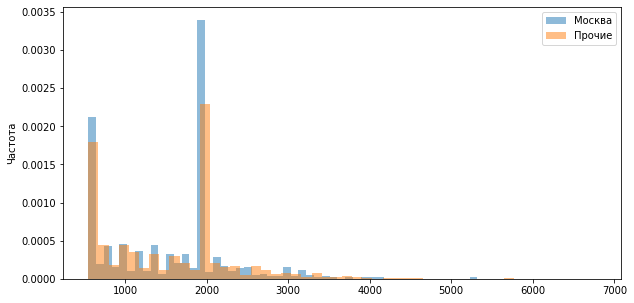

In [41]:
usage_per_month.query('city == "Москва"')['total_cost'].plot(kind = 'hist', alpha = 0.5, 
                                                            density = True, bins = 50)
usage_per_month.query('city != "Москва"')['total_cost'].plot(kind = 'hist', alpha = 0.5, 
                                                            density = True, bins = 50)
plt.legend(['Москва', 'Прочие'])
plt.ylabel('Частота')
plt.show()

Как можно видеть, графики практически совпадают. 

## Вывод
После проверки выдвинутых гипотез первую (средняя выручка пользователей разных тарифов отличается) можно считать подтвердившейся, вторая (средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов) оказалась неверна.

## Общий вывод
В данной работе нами был исследована выборка клиентов оператора связи. Мы изучили полученный датасет, заполнили пропуски и обработали ошибочные значения. Далее нами для каждого клиента были рассчитаны по месяцам следующие показатели:
- Суммарная продолжительность телефонных разговоров;
- Общий интернет-трафик;
- Количество отправленных сообщений.   

На основании полученных значений произведен рассчет помесячной выручки с каждого клиента.

Далее мы исследовали, как различается поведение пользователей различных тарифов. Как и ожидалось, пользователям тарифа ___"Ultra"___ в среднем требуется больше минут, мегабайт трафика и сообщений в месяц - средние значения соответствующих показателей выше, чем для тарифа ___"Smart"___. В то же время отмечено, что разброс значений в первом тарифе существенно больше, чем во втором.  

Также мы увидели, что пользователи ___"Ultra"___ редко платят больше абонентской платы, что связано с достаточно высокими лимитами на минуты вызовов, сообщения и интернет в этом тарифе. С другой стороны, расходы пользователей ___"Smart"___ в более чем 70 процентах случаев превышают абонентскую плату.   

Исходя из полученных распределений также сделан вывод о том, что наиболее востребованной услугой является интернет, а наименее востребованной - отправка сообщений.

Наконец, нами были проверены две гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Первая гипотеза подтвердилась, что в принципе соответствует нашим ожиданиям. Вторая гипотеза была нами опровергнута, что также не вызвало вопросов.
